<a href="https://colab.research.google.com/github/oghenerosiloko/CiFar-10-Image-Classificatio/blob/main/CiFAR_10_Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **THE CIFAR-10 IMAGE CLASSIFICATION**

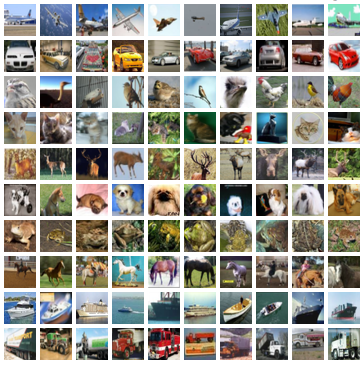

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes with 6000 images per class.
The dataset were collected by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. You can read more about the [source of the data set here](https://www.cs.toronto.edu/~kriz/cifar.html). 

The data stands for [The Canadian Institute For Advance Research](https://cifar.ca/) (CIFAR). it consist of several images divided into 10 classes.

*   Airplanes
*   Cars
*   Birds
*   Cats
*   Deers
*   Dogs
*   Frogs
*   Horses
*   Ships
*   Trucks

The images are of low resolution of 32 by 32, and i will aim to using Convolutionary Neural Network to build a model that will accurately classify the images.







**Load libraries and Data set**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#The Keras Library has the cifar-10 preloaded, so we just import it directly
#import and split into training and testing dataset
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

The Above codes examined the shape of our data set, we have 50000 training data and 10000 testing data which is enough to train a model.

### **Lets The Visualize Data**

[1]


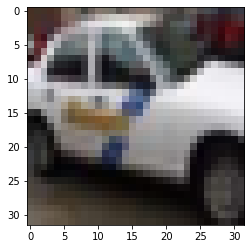

In [7]:
#Randomly Visualize a single picture
i = 2005 
plt.imshow(X_train[i])
print(y_train[i ])

even though the resolution of the picture is low, but we can see its a car belonging to class 1

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


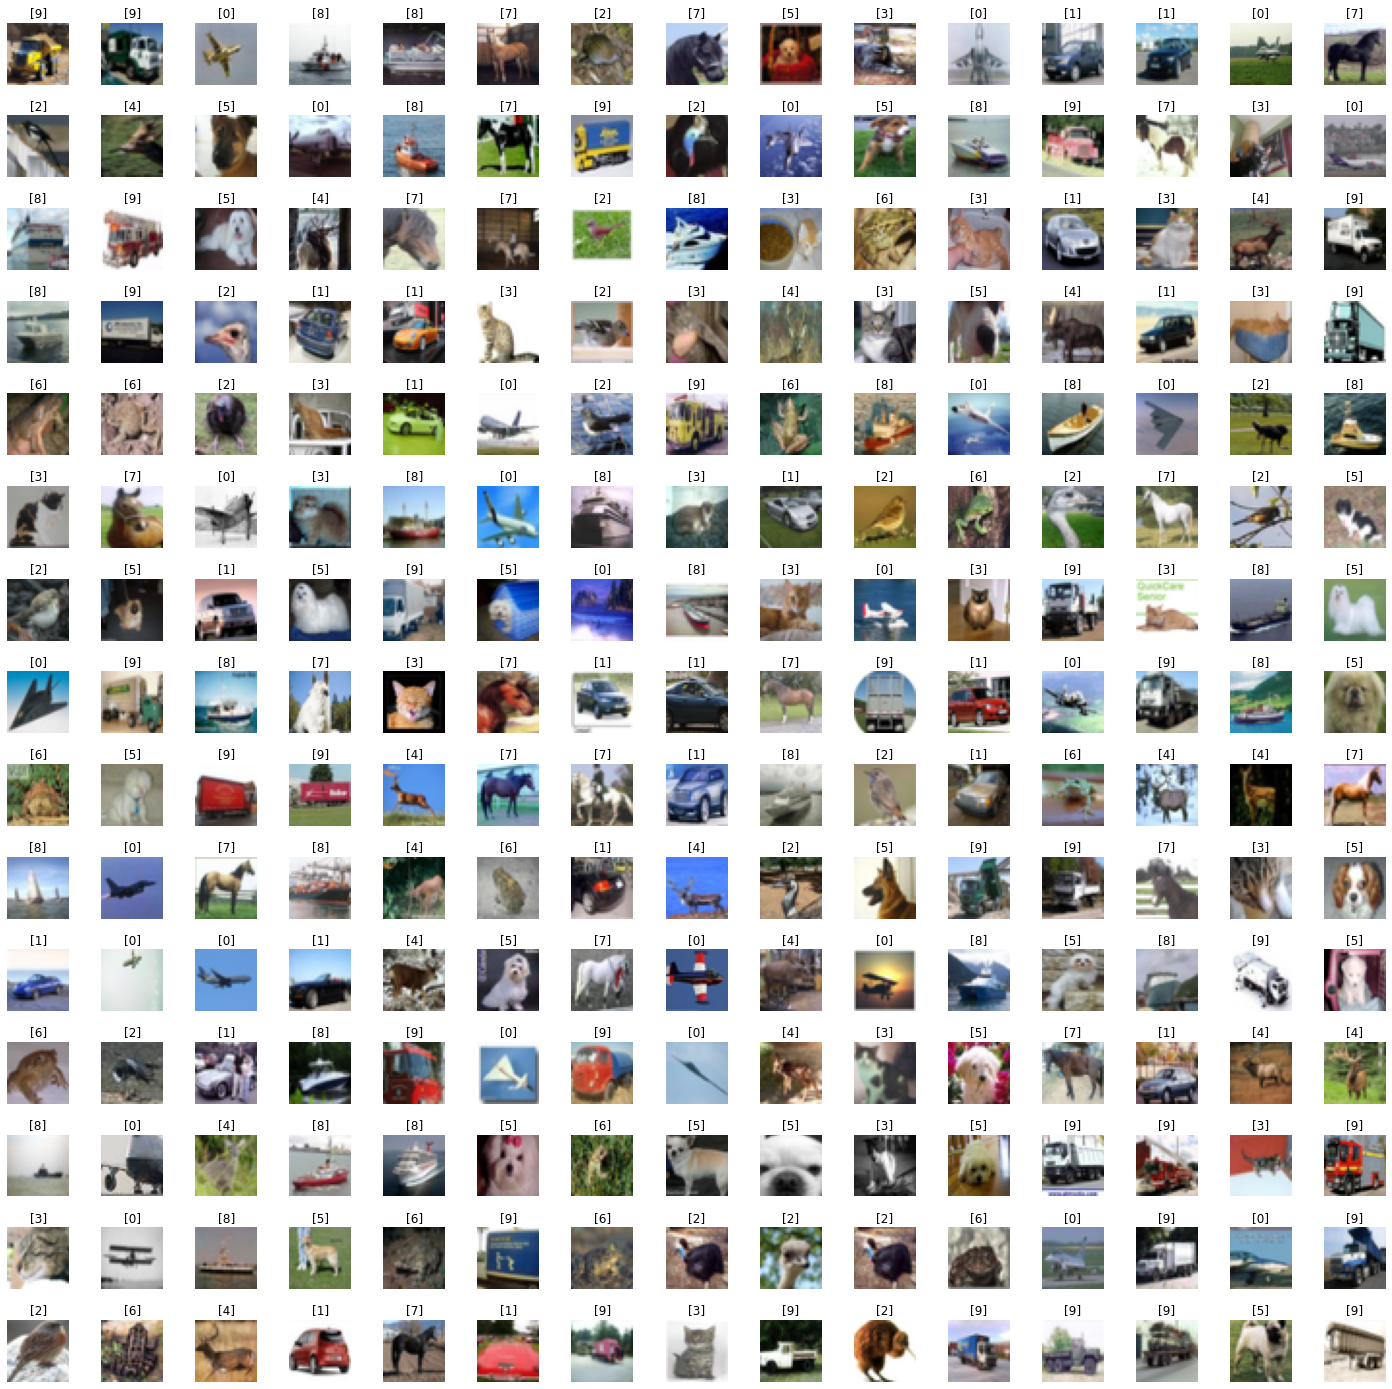

In [8]:
#Lets try and Visualize More of the Data
w_grid = 15
l_grid = 15
fig, axes = plt.subplots(l_grid, w_grid, figsize = (25, 25))
axes = axes.ravel()
n_training = len(X_train)

for i in np.arange(0, l_grid*w_grid):
  index = np.random.randint(0, n_training) # Pick a random number
  axes[i].imshow(X_train[index]) 
  axes[i].set_title(y_train[index])
  axes[i].axis('off')
plt.subplots_adjust(hspace= 0.5)

**Data Preparation**

In [9]:
#Converts data to floats
X_train= X_train.astype('float32')
X_test= X_test.astype('float32')

In [10]:
#specify number of classes
number_cat = 10

In [11]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [12]:
#Converting y_train to categorical
import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
y_train=tf.keras.utils.to_categorical(y_train,number_cat)

In [13]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
#Convert y_test to categorical
y_test = tf.keras.utils.to_categorical(y_test, number_cat)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [15]:
#Convert Training data
X_test = X_test/255
X_train = X_train/255

In [16]:
X_train    

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [17]:
#Specify input dimension size
input_shape=X_train.shape[1:]
input_shape

(32, 32, 3)

**Model Design**

In [18]:
#import libraries
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [19]:
 cnn_model= Sequential()
 cnn_model.add(Conv2D(filters= 64, kernel_size= (3,3), activation= 'relu', input_shape = input_shape))
 cnn_model.add(Conv2D(filters= 64, kernel_size= (3,3), activation= 'relu'))
 cnn_model.add (MaxPooling2D(2,2))
 cnn_model.add(Dropout(0.3))
 
 
 cnn_model.add(Conv2D(filters= 128, kernel_size= (3,3), activation= 'relu'))
 cnn_model.add(Conv2D(filters= 128, kernel_size= (3,3), activation= 'relu'))
 cnn_model.add (MaxPooling2D(2,2))
 cnn_model.add(Dropout(0.2))

#Flatten
 cnn_model.add(Flatten())
#Add Dense Blocks 
 cnn_model.add(Dense (units= 512, activation = 'relu'))
 cnn_model.add(Dense (units= 512, activation = 'relu'))
 
#output layer
 cnn_model.add(Dense(units= 10, activation = 'softmax'))

In [20]:
#lets view model architecture
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0

**COMPILE AND FIT MODEL**

In [21]:
cnn_model.compile (loss= 'categorical_crossentropy', optimizer= keras.optimizers.RMSprop(lr = 0.001), metrics = ['accuracy'] )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [22]:
history = cnn_model.fit(X_train, y_train, batch_size =32, epochs =8, shuffle= True)

Epoch 1/8
1563/1563 [==============================] - 514s 318ms/step - loss: 1.8300 - accuracy: 0.3326
Epoch 2/8
1563/1563 [==============================] - 511s 327ms/step - loss: 1.1393 - accuracy: 0.6030
Epoch 3/8
1563/1563 [==============================] - 505s 323ms/step - loss: 0.9817 - accuracy: 0.6656
Epoch 4/8
1563/1563 [==============================] - 503s 322ms/step - loss: 0.9486 - accuracy: 0.6818
Epoch 5/8
1563/1563 [==============================] - 521s 333ms/step - loss: 0.9187 - accuracy: 0.6961
Epoch 6/8
1563/1563 [==============================] - 521s 333ms/step - loss: 0.9048 - accuracy: 0.6990
Epoch 7/8
1563/1563 [==============================] - 513s 328ms/step - loss: 0.9105 - accuracy: 0.6991
Epoch 8/8
1563/1563 [==============================] - 512s 328ms/step - loss: 0.9068 - accuracy: 0.7030


Text(0.5, 0, 'epoch')

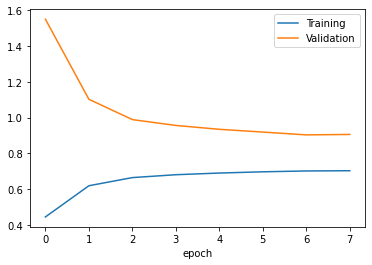

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.legend(['Training', 'Validation'])
plt.xlabel('epoch')

**Evaluate Model**

In [24]:
evaluation =cnn_model.evaluate(X_test, y_test)
print('Test Accuracy: {}%'.format(evaluation [1]*100))

313/313 [==============================] - 26s 80ms/step - loss: 0.9418 - accuracy: 0.6775
Test Accuracy: 67.75000095367432%


In [25]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([3, 0, 0, ..., 5, 0, 7])

In [26]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [27]:
y_test =y_test.argmax(1)

In [28]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

**Let's visualize predicted class with true class**

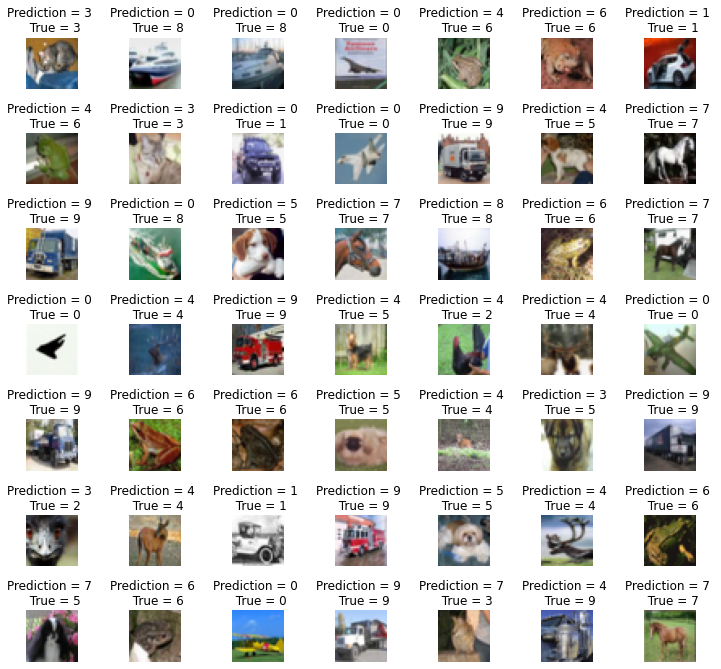

In [29]:
L=7
W=7
fig, axes =plt.subplots(L,W,figsize =(12,12))
axes =axes.ravel()
 
for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {} \n  True = {}'.format(predicted_classes[i], y_test[i]))
    axes[i].axis("off")
 
plt.subplots_adjust(wspace =1)

We can see our model perform well in predicting the true class

In [30]:
#Lets Employ Confusion Matrix to Summarize the Performance of the Model
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, predicted_classes)
cm

array([[923,   2,  14,  10,  27,   0,   1,   9,   4,  10],
       [112, 772,   3,   8,   6,   1,   4,   7,   9,  78],
       [152,   0, 422,  62, 193,  10,  44, 112,   2,   3],
       [ 85,   1,  32, 545, 131,  44,  44, 115,   1,   2],
       [ 31,   0,  18,  29, 819,   2,  24,  75,   1,   1],
       [ 35,   1,  31, 215,  91, 408,  14, 203,   0,   2],
       [ 44,   0,  44,  51, 114,   3, 715,  29,   0,   0],
       [ 19,   0,  10,  29,  86,   3,   2, 851,   0,   0],
       [361,   9,   9,  11,  27,   3,   6,   6, 554,  14],
       [124,  41,   6,  20,  10,   2,   3,  26,   2, 766]])

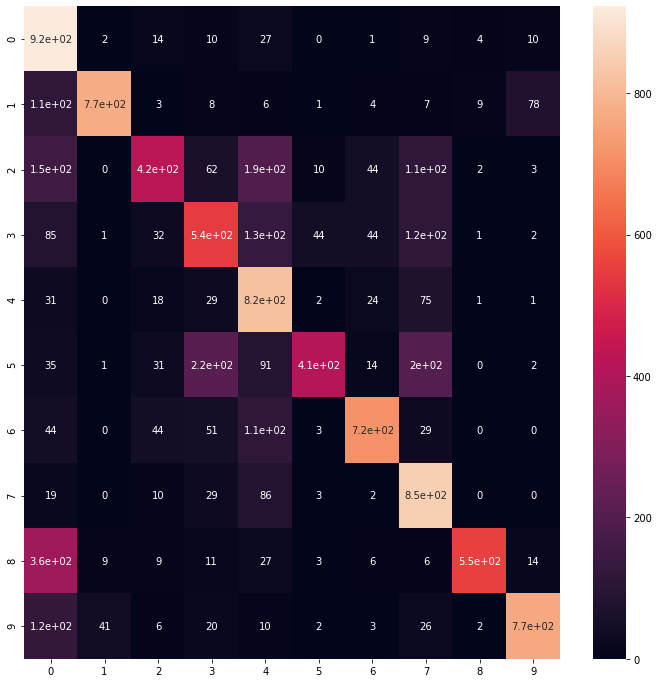

In [31]:
#lets visualize model Performance 
plt.figure(figsize =(12,12))
sns.heatmap(cm, annot= True)

**Lets Save model**

In [32]:
#import os
#directory=os.path.join(os.getcwd(), "Saved_Models")
 
#if not os.path.isdir(directory):
   #  os.makedirs(directory)
#model_path= os.path.join(directory, 'keras_cifar10_trained_model.h5')
#cnn_model.save(model_path)